In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('C:\\Users\\Usuario\\TFG\\digipanca\\')

In [3]:
from src.data.dataset3d import PancreasDataset3D
import matplotlib.pyplot as plt

In [4]:
DATA_DIR = 'data/processed/train'
train_ds = PancreasDataset3D(
    data_dir=DATA_DIR
)

In [5]:
print(len(train_ds))

1


In [6]:
item = train_ds[0]
print(len(item))

4


torch.Size([256, 256, 64])


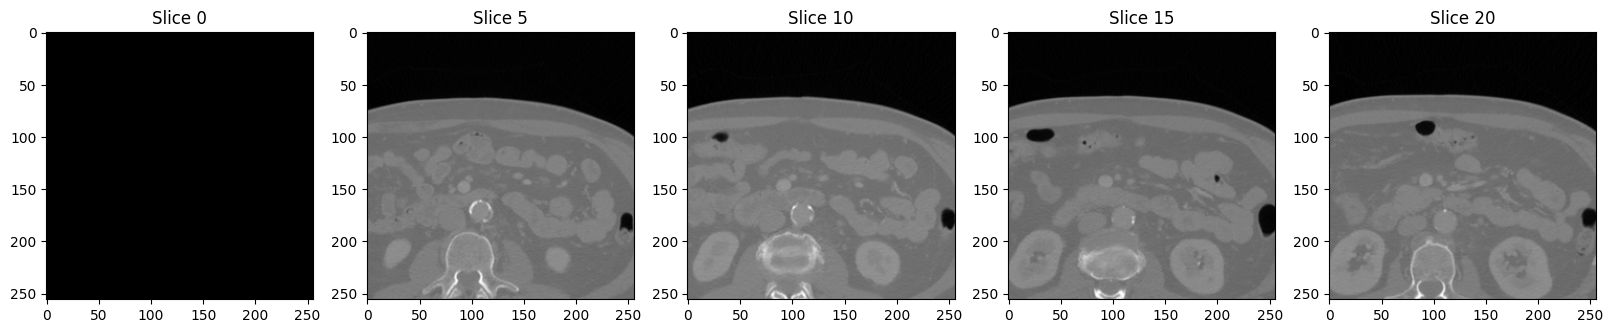

In [7]:
image = item[0].squeeze()
print(image.shape)
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, idx in enumerate([0, 5, 10, 15, 20]):  # Slices clave
    axes[i].imshow(image[:, :, idx], cmap="gray")
    axes[i].set_title(f"Slice {idx}")
plt.show()

# Testing with transforms and augmentations

In [8]:
from src.utils.config import load_config
from src.data.transforms import build_transforms_from_config
from src.data.augmentation import build_augmentations_from_config

In [9]:
transforms_config = load_config('configs/experiments/one_deep.yaml').get('transforms', None)
print(transforms_config)
aug_config = load_config('configs/experiments/one_deep.yaml').get('augmentations', None)
print(aug_config)
transforms = build_transforms_from_config(transforms_config)
augment = build_augmentations_from_config(aug_config)

[{'ApplyWindow': {'window_level': 50, 'window_width': 400}}, {'Normalize': {}}, {'CropBorders': {'crop_size': 120}}, {'Resize': {'size': [8, 8]}}, {'ToTensor': {}}]
[{'Affine': {'scale': [0.95, 1.05], 'translate_percent': [0.02, 0.02], 'rotate': [-10, 10], 'p': 0.2}}, {'RandomBrightnessContrast': {'brightness_limit': 0.2, 'contrast_limit': 0.2, 'p': 0.3}}, {'GaussianBlur': {'blur_limit': [3, 7], 'p': 0.3}}, {'ElasticTransform': {'alpha': 1.0, 'sigma': 50, 'p': 0.3}}, {'GridDistortion': {'num_steps': 5, 'distort_limit': 0.3, 'p': 0.3}}, {'ToTensorV2': {}}]


In [10]:
ds = PancreasDataset3D(
    data_dir=DATA_DIR,
    transform=transforms
)

torch.Size([8, 8, 64])


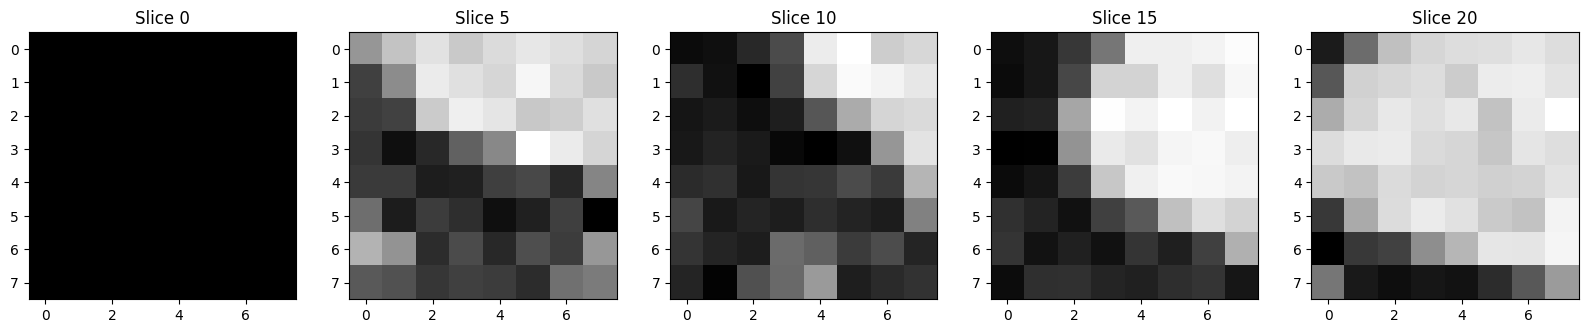

In [11]:
image = (ds[0])[0].squeeze()
print(image.shape)
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, idx in enumerate([0, 5, 10, 15, 20]):  # Slices clave
    axes[i].imshow(image[:, :, idx], cmap="gray")
    axes[i].set_title(f"Slice {idx}")
plt.show()